# 01 - Data Exploration: Framingham Heart Study

This notebook performs exploratory data analysis (EDA) on the Framingham Heart Study dataset.
The goal is to understand the structure, distributions, and quality of the dataset, and prepare it for modeling.

---

## Step 1: Load Raw Dataset


In [1]:
import pandas as pd

df = pd.read_csv("../../data/raw/framingham.csv")



In [2]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [8]:
# Summary statistics
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


---

## Step 2: Check for Missing Values


In [3]:
# Count missing values per column
df.isnull().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [10]:
# Percentage missing (optional)
df.isnull().mean().sort_values(ascending=False) * 100

glucose            9.150943
education          2.476415
BPMeds             1.250000
totChol            1.179245
cigsPerDay         0.683962
BMI                0.448113
heartRate          0.023585
male               0.000000
age                0.000000
currentSmoker      0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
dtype: float64

We will drop rows with missing values for simplicity in this phase.
Later we can explore imputation if needed.


In [9]:
df_cleaned = df.dropna()
df_cleaned.shape

(3658, 16)

---

## Step 3: Feature Distributions

We examine the distributions of key variables using histograms.


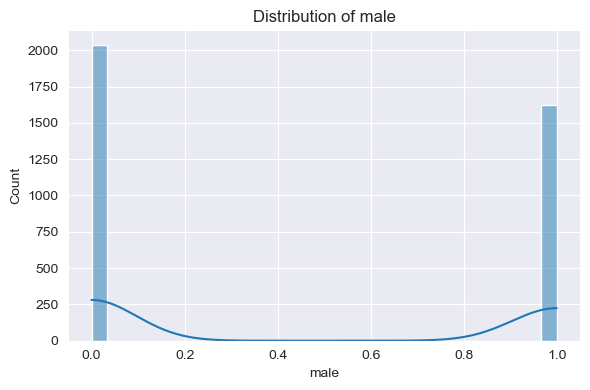

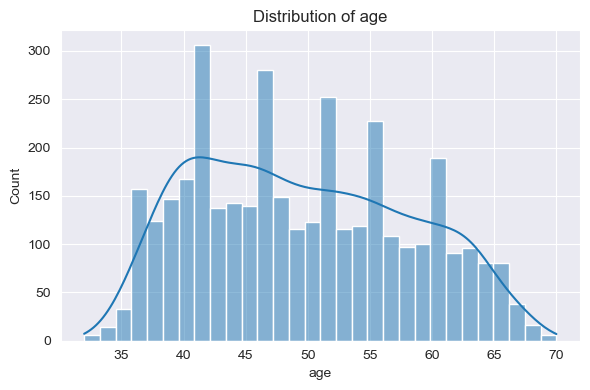

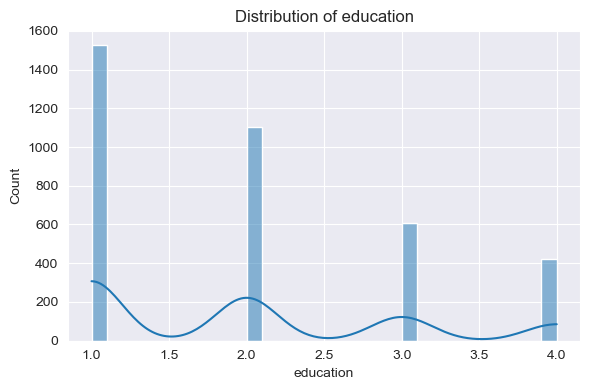

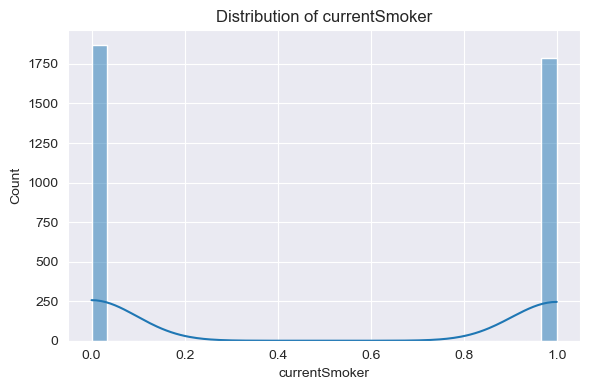

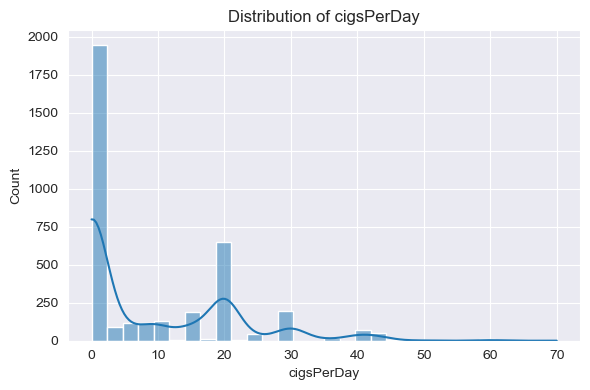

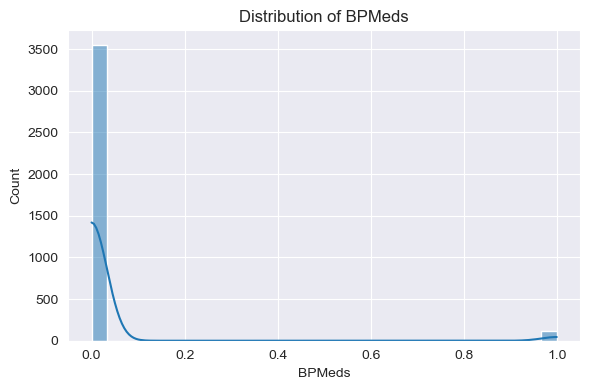

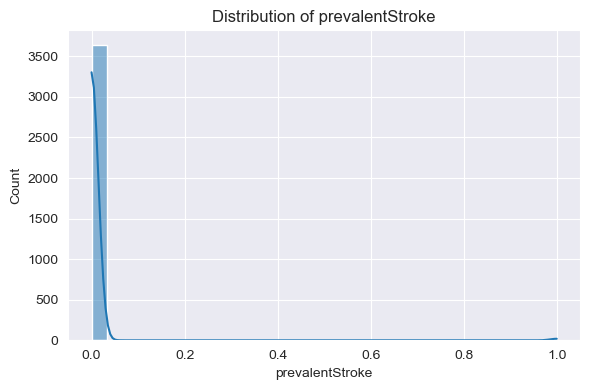

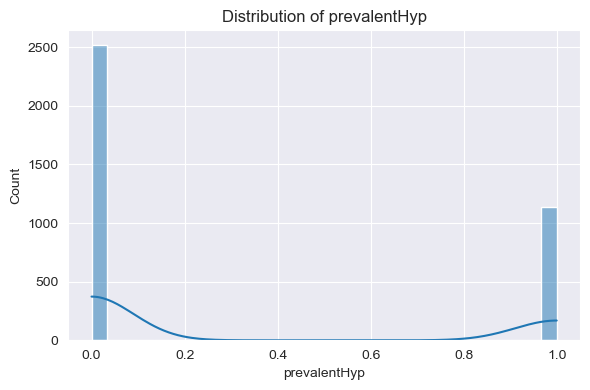

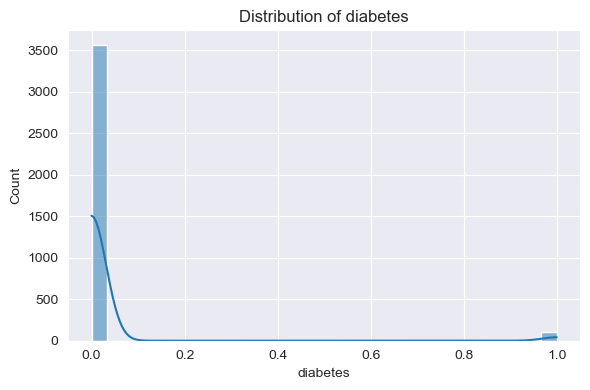

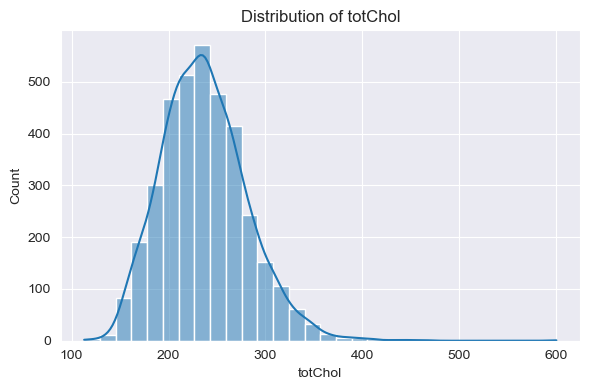

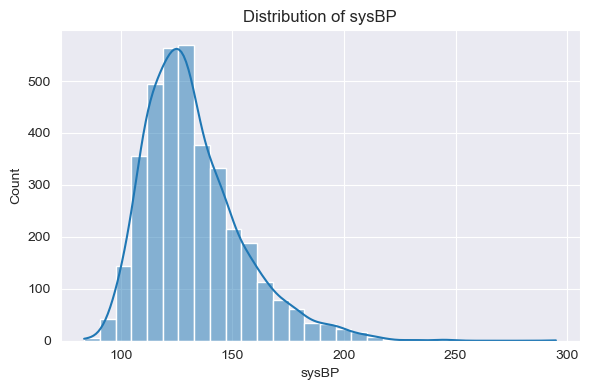

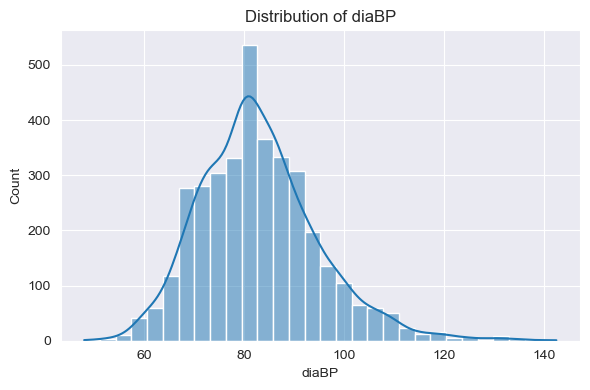

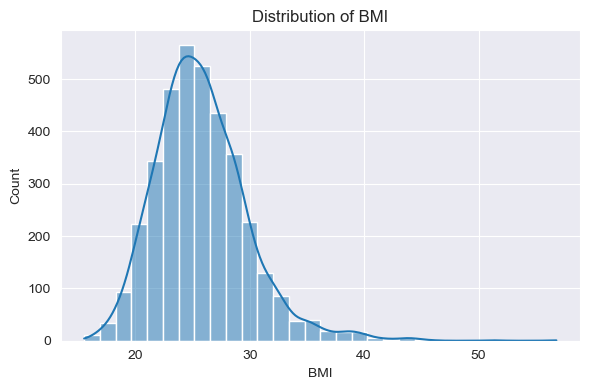

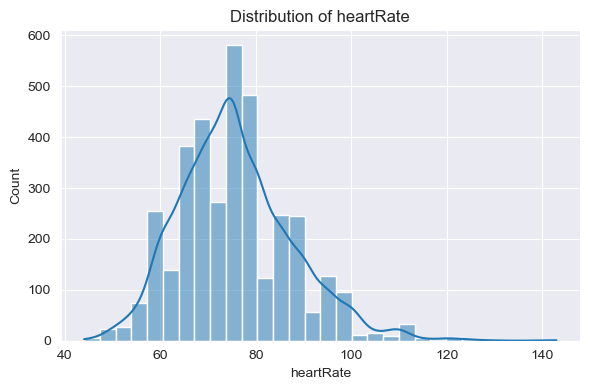

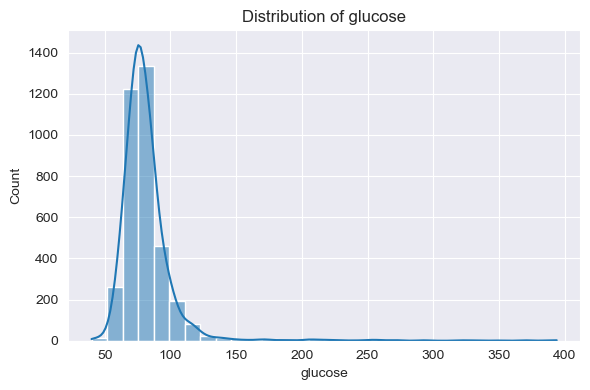

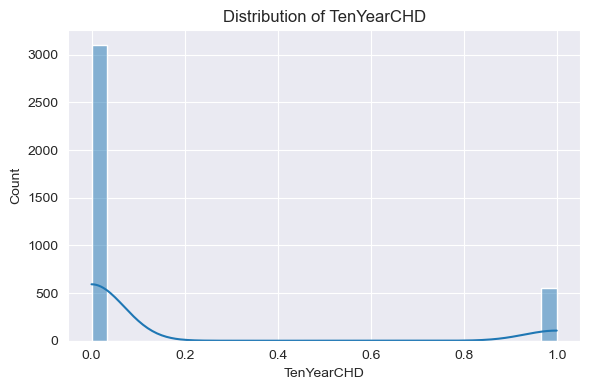

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions
for col in df_cleaned.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


---

## Step 4: Correlation Heatmap


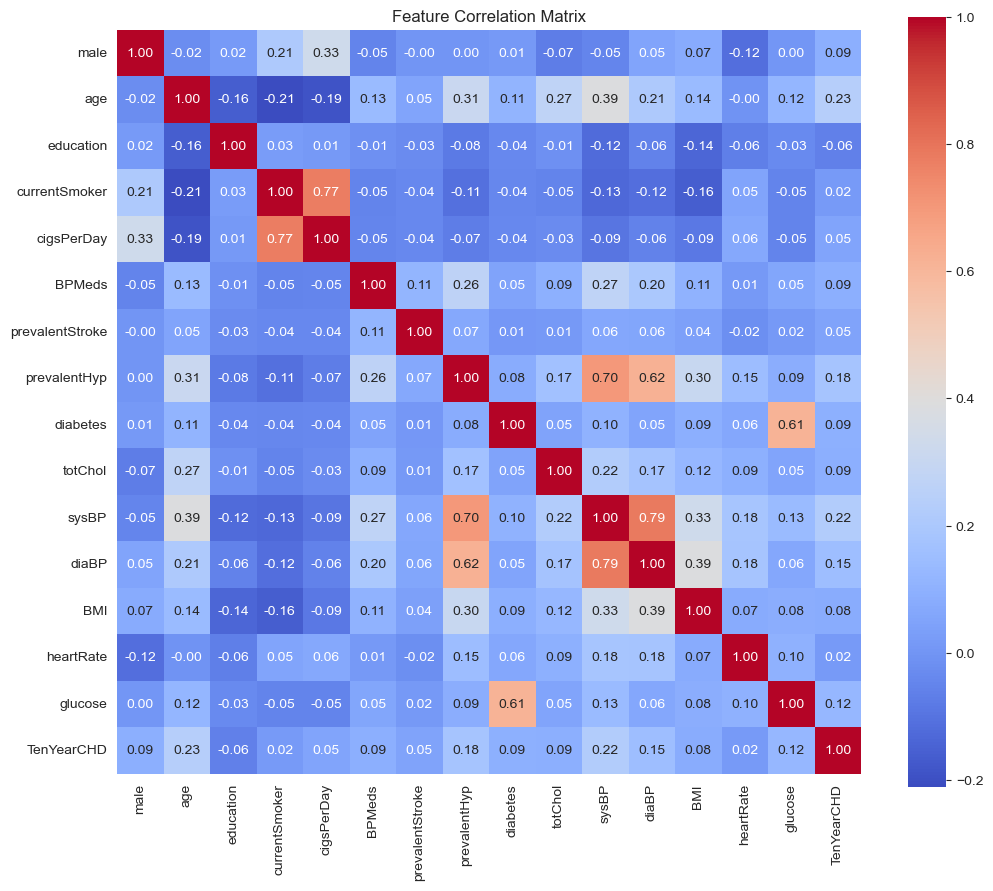

In [11]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.savefig("../results/figures/correlation_matrix.png")
plt.show()


---

## Step 5: Target Variable Distribution

The target variable is `TenYearCHD`, representing whether the patient developed coronary heart disease within 10 years.


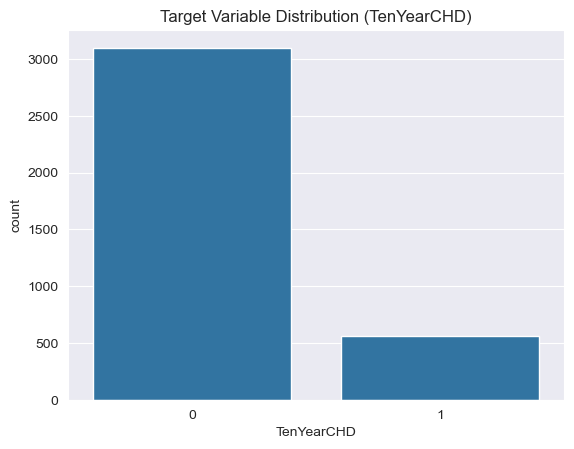

In [12]:
sns.countplot(x='TenYearCHD', data=df_cleaned)
plt.title("Target Variable Distribution (TenYearCHD)")
plt.savefig("../results/figures/target_distribution.png")
plt.show()


---

## Step 6: Save Cleaned Dataset


In [13]:
# Save processed version to use in modeling
df_cleaned.to_csv("../data/processed/cleaned_framingham.csv", index=False)


✅ The cleaned dataset is now saved and ready to be used in modeling notebooks (starting with `02_lasso_regression.ipynb`).

---

## ✅ Summary:

- Loaded raw dataset with shape: `(rows, columns)`
- Dropped rows with missing values (temporary choice)
- Visualized distributions and feature correlations
- Saved cleaned data for modeling

Next step: Build a baseline model using Lasso regression.
